# 급감속, 과속 지점 시각화
* 이미지 합성을 위함
* 급감속 및 과속이 이루어진 지점을 선형으로 표시
* Plotly Map에 배경이미지 합성

In [1]:
import datetime as dt
import os
import pandas as pd
import numpy as np

# Plotly : 인터랙티브 그래프를 그려주는 패키지
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as po

In [13]:
save_dir = 'D:/OneDrive - 연세대학교 (Yonsei University)/Projects/Yonsei_TELab/003_도로상충_210517-/2차년도_2022/36_남양주TG+서울TG_급진로변경분석/남양주TG_양양방향'

# 과속

In [9]:
ovs_dir = 'D:/OneDrive - 연세대학교 (Yonsei University)/Projects/Yonsei_TELab/003_도로상충_210517-/2차년도_2022/34_남양주TG_드론영상 현황 분석/ovs_dec_dataset/양양방향/과속'

In [10]:
file_list = os.listdir(ovs_dir)

In [11]:
file_list

['list_overspeed04_1_A.csv', 'list_overspeed04_2_A.csv']

In [12]:
ovs_list = []
ovs_list.append(file_list[-1])

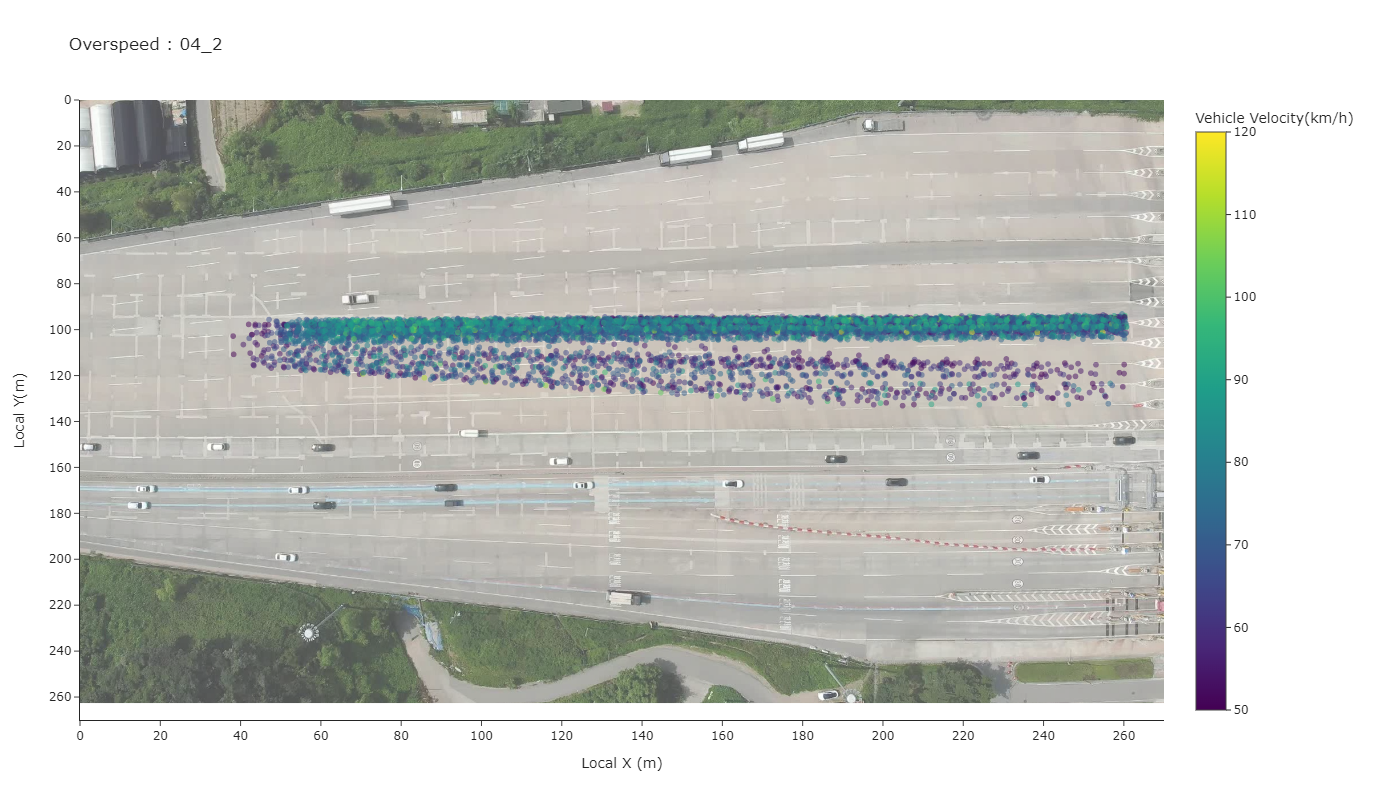

In [25]:
for ovs in ovs_list:
    # 각 파일 별로 점 그래프 그리기
    ovs_path = os.path.join(ovs_dir, ovs)

    ovs_df = pd.read_csv(ovs_path)
    ovs_df = ovs_df[ovs_df['overspeed'] == 'Overspeed']
    
    fig = px.scatter(ovs_df, x = 'Local X (m)', y = 'Local Y(m)', 
                     color = 'Vehicle Velocity(km/h)',
                     opacity = 0.5,
                     title = f'Overspeed : {ovs[-10:-6]}',
                     template = 'simple_white',
                     width = 900,
                     height = 800,
                     range_color = [50, 120])
        
    fig.update_xaxes(range = [0, 270], dtick = 20)
    fig.update_yaxes(range = [270, 0], dtick = 20)
        
    fig.add_layout_image(
        dict(#row = 1,
            #col = 1,
            source = 'https://i.imgur.com/FTEMGIw.jpg',
            xref = 'x domain',
            yref = 'y domain',
            x = 1,
            y = 1,
            xanchor = 'right',
            yanchor = 'top',
            sizex = 1,
            sizey = 1,
            #sizing = "stretch",
            opacity = 0.7,
            layer = "below"))
        
    #fig.update_traces(marker = dict(color = 'red', opacity = 0.5))
    
    save_html_name = f'scatter_overspeed_{ovs[-10:-6]}.html'
    save_html_path = os.path.join(save_dir, save_html_name)
    
    po.write_html(fig, file = save_html_path) # html Plotly 파일 저장
        
    save_png_name = f'scatter_overspeed_{ovs[-10:-6]}.png'
    save_png_path = os.path.join(save_dir, save_png_name)        
        
    fig.write_image(save_png_path)
    
    fig.show()

# 급감속

In [18]:
dec_dir = 'D:/OneDrive - 연세대학교 (Yonsei University)/Projects/Yonsei_TELab/003_도로상충_210517-/2차년도_2022/34_남양주TG_드론영상 현황 분석/ovs_dec_dataset/양양방향/급감속'

In [20]:
dec_list = os.listdir(dec_dir)
dec_list

['SuddenDec04_1_A.csv', 'SuddenDec04_2_A.csv']

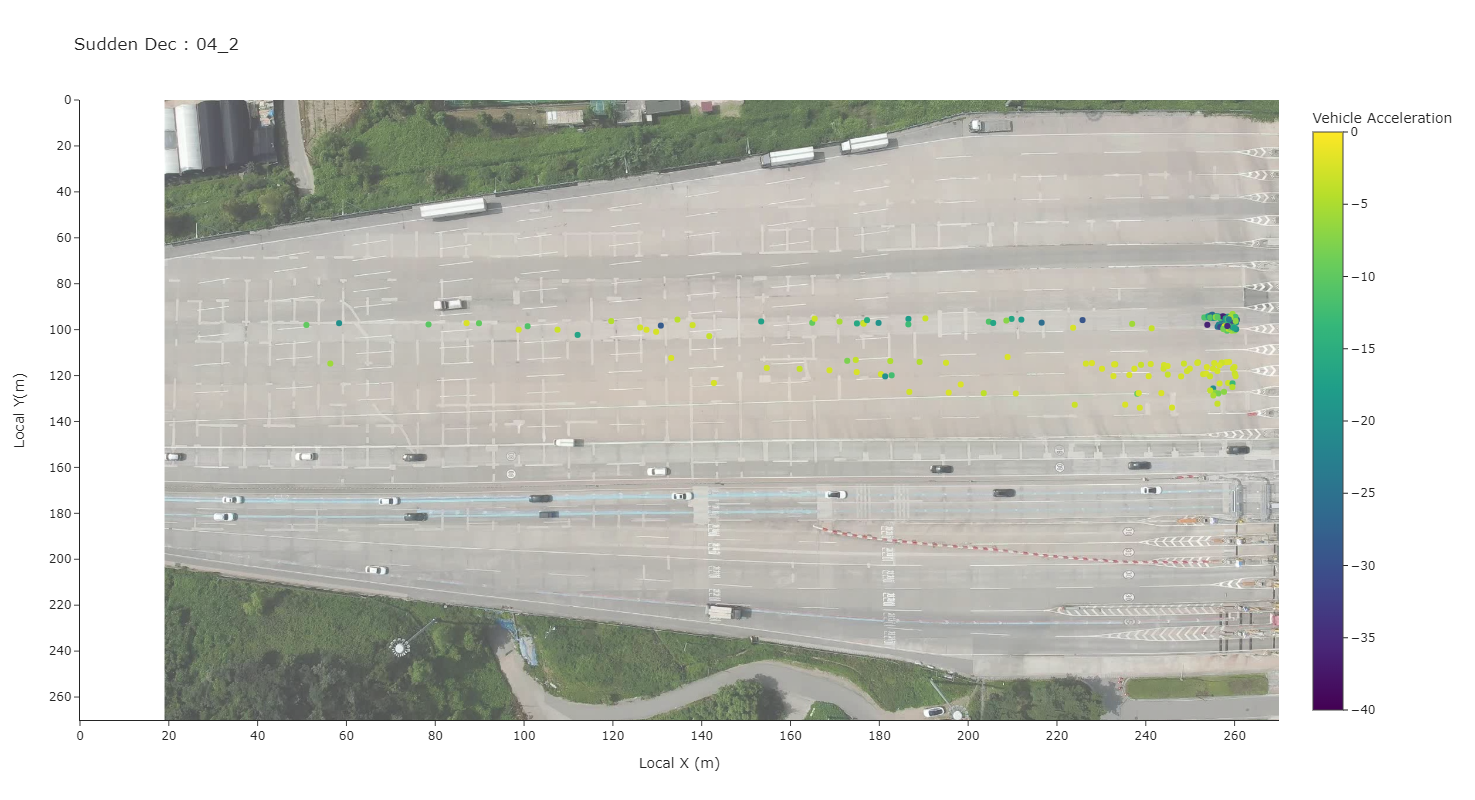

In [22]:
for dec in dec_list:
    # 각 파일 별로 점 그래프 그리기
    
    if dec[-3:] == 'csv':
        dec_path = os.path.join(dec_dir, dec)
        dec_df = pd.read_csv(dec_path)
    
        dec_df = dec_df[dec_df['sudden_dec'] == 'sudden_dec']
    
        fig = px.scatter(dec_df, x = 'Local X (m)', y = 'Local Y(m)', 
                         color = 'Vehicle Acceleration',
                         title = f'Sudden Dec : {dec[-10:-6]}',
                         template = 'simple_white',
                         width = 900,
                         height = 800,
                         range_color = [-40, 0])
        
        fig.update_xaxes(range = [0, 270], dtick = 20)
        fig.update_yaxes(range = [270, 0], dtick = 20)

        fig.add_layout_image(
            dict(#row = 1,
                #col = 1,
                source = 'https://i.imgur.com/FTEMGIw.jpg',
                xref = 'x domain',
                yref = 'y domain',
                x = 1,
                y = 1,
                xanchor = 'right',
                yanchor = 'top',
                sizex = 1,
                sizey = 1,
                #sizing = "stretch",
                opacity = 0.7,
                layer = "below"))
        
        #fig.update_traces(marker = dict(color = 'red', opacity = 0.5))
        
        save_html_name = f'suddendec_{dec[-10:-6]}.html'
        save_html_path = os.path.join(save_dir, save_html_name)
    
        po.write_html(fig, file = save_html_path) # html Plotly 파일 저장
        
        save_png_name = f'suddendec_{dec[-10:-6]}.png'
        save_png_path = os.path.join(save_dir, save_png_name)        
        
        fig.write_image(save_png_path)
    
    else:
        pass
    
fig.show()